Build a regression model.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('poi_count.tsv', sep='\t')
df

,Unnamed: 0,Unnamed: 0.1,city,station_name,empty_slots,slots,free_bikes,ebikes,latitude,longitude,timestamp,foursquare_num_poi,Yelp_poi_count
0,0,0,Toronto,Queen St E / Woodward Ave,12,19,5,0,43.665269,-79.319796,2023-06-05T15:38:08.527000Z,0,178
1,1,1,Toronto,Primrose Ave / Davenport Rd,12,15,3,0,43.671420,-79.445947,2023-06-05T15:38:08.527000Z,0,144
2,2,2,Toronto,Queen St. E / Rhodes Ave.,13,23,10,0,43.666224,-79.317693,2023-06-05T15:38:08.528000Z,0,157
3,3,3,Toronto,Bond St / Queen St E,8,25,16,0,43.653236,-79.376716,2023-06-05T15:38:08.533000Z,0,1317
4,4,4,Toronto,Church St / Alexander St,12,15,2,0,43.663722,-79.380288,2023-06-05T15:38:08.534000Z,0,1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,658,658,Toronto,Lynn William St / Pirandello St,17,17,0,0,43.639125,-79.414232,2023-06-05T15:38:08.960000Z,0,386
659,659,659,Toronto,Bay St / Queens Quay W (Ferry Terminal),5,34,28,0,43.640978,-79.376785,2023-06-05T15:38:09.023000Z,0,434
660,660,660,Toronto,College St / Huron St,0,18,16,0,43.658148,-79.398167,2023-06-05T15:38:08.596000Z,0,506
661,661,661,Toronto,Ossington Ave / Bruce St,10,15,4,0,43.645702,-79.419332,2023-06-05T15:38:08.977000Z,0,538


In [6]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df.head(5)

,city,station_name,empty_slots,slots,free_bikes,ebikes,latitude,longitude,timestamp,foursquare_num_poi,Yelp_poi_count
0,Toronto,Queen St E / Woodward Ave,12,19,5,0,43.665269,-79.319796,2023-06-05T15:38:08.527000Z,0,178
1,Toronto,Primrose Ave / Davenport Rd,12,15,3,0,43.671420,-79.445947,2023-06-05T15:38:08.527000Z,0,144
2,Toronto,Queen St. E / Rhodes Ave.,13,23,10,0,43.666224,-79.317693,2023-06-05T15:38:08.528000Z,0,157
3,Toronto,Bond St / Queen St E,8,25,16,0,43.653236,-79.376716,2023-06-05T15:38:08.533000Z,0,1317
4,Toronto,Church St / Alexander St,12,15,2,0,43.663722,-79.380288,2023-06-05T15:38:08.534000Z,0,1004


In [4]:
df.dtypes

city                   object
station_name           object
empty_slots             int64
slots                   int64
free_bikes              int64
ebikes                  int64
latitude              float64
longitude             float64
timestamp              object
foursquare_num_poi      int64
Yelp_poi_count          int64
dtype: object

In [ ]:
# descriptive stats
df.describe()

,empty_slots,slots,free_bikes,ebikes,latitude,longitude,foursquare_num_poi,Yelp_poi_count
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.0,663.000000
mean,10.491704,18.882353,8.006033,0.150830,43.667176,-79.393309,0.0,418.322775
std,7.040850,6.296887,7.373503,0.876788,0.029916,0.057880,0.0,384.321737
min,0.000000,0.000000,0.000000,0.000000,43.588077,-79.544491,0.0,0.000000
25%,5.000000,15.000000,2.000000,0.000000,43.648685,-79.425058,0.0,130.000000
50%,11.000000,19.000000,6.000000,0.000000,43.661547,-79.393249,0.0,286.000000
75%,15.000000,22.000000,13.000000,0.000000,43.678361,-79.368560,0.0,595.500000
max,44.000000,57.000000,46.000000,14.000000,43.788319,-79.123505,0.0,1653.000000


In [11]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                663 non-null    object 
 1   station_name        663 non-null    object 
 2   empty_slots         663 non-null    int64  
 3   slots               663 non-null    int64  
 4   free_bikes          663 non-null    int64  
 5   ebikes              663 non-null    int64  
 6   latitude            663 non-null    float64
 7   longitude           663 non-null    float64
 8   timestamp           663 non-null    object 
 9   foursquare_num_poi  663 non-null    int64  
 10  Yelp_poi_count      663 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 57.1+ KB


In [12]:
# check for duplicates for Id
nameUnique = len(set(df.station_name))
nameTotal = df.shape[0]
namedupe = nameTotal - nameUnique
print(namedupe)


0


Provide model output and an interpretation of the results. 

<AxesSubplot:xlabel='Yelp_poi_count', ylabel='Count'>

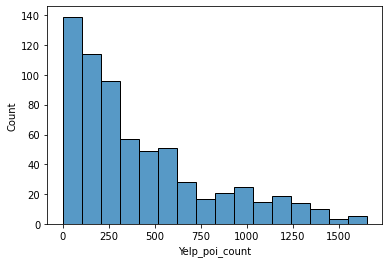

In [13]:
# explorary target variable
#histogram
sns.histplot(df['Yelp_poi_count'])

In [14]:
print(list(df.columns))

['city', 'station_name', 'empty_slots', 'slots', 'free_bikes', 'ebikes', 'latitude', 'longitude', 'timestamp', 'foursquare_num_poi', 'Yelp_poi_count']


<AxesSubplot:xlabel='Yelp_poi_count', ylabel='empty_slots'>

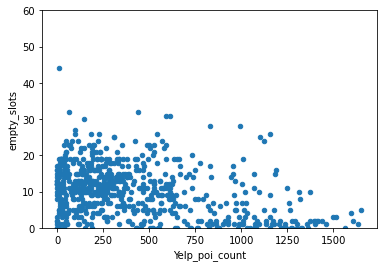

In [15]:
# scatter plot poi count vs empty slots
var = 'Yelp_poi_count'
data = df[['empty_slots',var]]
data.plot.scatter(x=var, y='empty_slots',ylim=(0,60))

<AxesSubplot:>

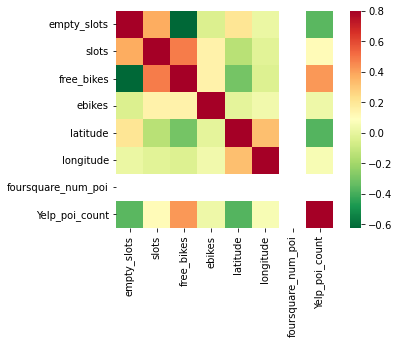

In [17]:
# correlation matrix 
corrmat = df.corr()
#f, ax = plt.plots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8,square=True,cmap='RdYlGn_r')

In [18]:
import statsmodels.api as sm

In [24]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('foursquare_num_poi')
numeric_cols.remove('free_bikes')
numeric_cols

['empty_slots', 'slots', 'ebikes', 'latitude', 'longitude', 'Yelp_poi_count']

In [25]:
x = df[numeric_cols]
y = df['Yelp_poi_count']

In [26]:
x_cost = sm.add_constant(x) # adding a constant 
lin_reg = sm.OLS(y,x_cost)
model = lin_reg.fit()

/Users/siyimo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         Yelp_poi_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.213e+28
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:23:13   Log-Likelihood:                 15317.
No. Observations:                 663   AIC:                        -3.062e+04
Df Residuals:                     656   BIC:                        -3.059e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9.777e-12   2.32e-09      0.

# Stretch

How can you turn the regression model into a classification model?